# ML Manual


### 실습(11)

 데이터 전처리
 

In [57]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 출력


f:\박정현\ML\Jeju_Water


In [58]:
import pandas as pd

# 파일 읽기
jeju = pd.read_excel(r'F:\박정현\ML\Jeju_Water\JejuData.xlsx', engine='openpyxl')
data = jeju.copy()
# 컬럼 이름 트리밍
data.columns = data.columns.str.strip()

# 제거할 컬럼 리스트
drop_col = ['id', 'NO3-N_sum', '95Quantile', 'Count', 'median', '토지피복_1',
            '토지피복_2', '토지피복_3', '토지피복_4','토지피복_6', '토지피복_7', '토지피복_9', 
            '모암모재_0', '모암모재_1', '모암모재_3', '모암모재_4', '모암모재_6', '모암모재_8', 
            '모암모재_9', '토양유형_0','토양유형_1','토양유형_2', '토양유형_3', '토양유형_4', '토양유형_5', 
            '토양유형_6', '토양유형_7', '토양유형_8', '토양유형_9', '토양유형10', '토양유형11', 
            '토양유형12', '토지피복총', '제3기층비?', '토양유형총', '인덱스값', 'x', 'y']


# 불필요한 컬럼 제거 및 결측값 제거
data = data.drop(drop_col, axis=1, errors='ignore')
data = data.dropna()

# 데이터 필터링 및 타입 변환
data = data[data['mean'] != 'no']
data['mean'] = data['mean'].astype(float)

# 컬럼 선택
data_mean = data['mean']
data_x = data.iloc[:, 1:]

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1 to 596
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    440 non-null    float64
 1   시가화비율   440 non-null    float64
 2   농업비율    440 non-null    float64
 3   산림비율    440 non-null    float64
 4   초지비율    440 non-null    float64
 5   나지비율    440 non-null    float64
 6   모암모재총   440 non-null    int64  
 7   산성암비율   440 non-null    float64
 8   염기성암비   440 non-null    float64
 9   퇴적암비율   440 non-null    float64
 10  화산회비율   440 non-null    float64
 11  보통논     440 non-null    float64
 12  미숙논비율   440 non-null    float64
 13  임지비율    440 non-null    float64
 14  습논비율    440 non-null    float64
 15  염해논비율   440 non-null    float64
 16  보통밭비율   440 non-null    float64
 17  임지2비율   440 non-null    float64
 18  사질밭비율   440 non-null    float64
 19  중점밭비율   440 non-null    float64
 20  화산회밭비   440 non-null    float64
 21  임지3비율   440 non-null    float64
 22  개인하수처  

In [59]:
## 측정된 NO3-N농도가 없는 격자 제거 작업이 생략됨
# 총 600개의 격자 중 440개의 격자를 본 사례에 사용

In [60]:
data.corr()
# 기술통계

,mean,시가화비율,농업비율,산림비율,초지비율,나지비율,모암모재총,산성암비율,염기성암비,퇴적암비율,...,저류지,지열이용시,지정폐기물,축산폐수배,특정토양오,폐기물처리,폐수배출시,하수처리장,평균고도,농업인덱스
mean,1.000000,0.168143,0.518074,-0.418899,-0.391414,0.046320,-0.157917,-0.046001,0.398614,0.209286,...,0.241140,-0.034960,-0.005609,0.093818,0.015298,0.005789,-0.003507,0.131411,-0.561328,0.452144
시가화비율,0.168143,1.000000,0.064680,-0.446725,-0.425316,0.115966,-0.551853,-0.014668,0.563994,0.089058,...,-0.027045,-0.072625,0.594085,-0.151371,0.639356,0.091247,0.551104,0.092836,-0.451767,0.073387
농업비율,0.518074,0.064680,1.000000,-0.746060,-0.581913,-0.105882,0.051338,-0.053252,0.388830,0.042209,...,0.227127,0.149343,-0.087060,0.231363,-0.057658,-0.060374,-0.066054,0.061891,-0.641112,0.868234
산림비율,-0.418899,-0.446725,-0.746060,1.000000,0.211898,-0.068539,0.153739,0.073287,-0.468911,-0.068965,...,-0.137500,-0.076699,-0.167989,-0.131145,-0.210541,-0.008852,-0.166436,-0.104615,0.671412,-0.688730
초지비율,-0.391414,-0.425316,-0.581913,0.211898,1.000000,0.052992,0.244657,-0.002324,-0.474071,-0.064575,...,-0.137630,-0.053877,-0.178814,-0.029754,-0.215949,0.027675,-0.175780,-0.043922,0.503517,-0.466848
나지비율,0.046320,0.115966,-0.105882,-0.068539,0.052992,1.000000,-0.252099,-0.015547,-0.098990,0.112864,...,-0.019684,-0.061246,-0.056165,-0.105833,0.023919,-0.064233,-0.036062,0.050827,-0.086691,-0.075959
모암모재총,-0.157917,-0.551853,0.051338,0.153739,0.244657,-0.252099,1.000000,0.002357,-0.272681,-0.208806,...,0.086229,0.110393,0.007186,0.178882,-0.068075,0.079363,0.009759,-0.162634,0.321620,0.015105
산성암비율,-0.046001,-0.014668,-0.053252,0.073287,-0.002324,-0.015547,0.002357,1.000000,-0.041281,0.013769,...,0.004172,0.028863,-0.013998,-0.039199,-0.032510,-0.026254,-0.026216,-0.013591,0.051865,-0.050533
염기성암비,0.398614,0.563994,0.388830,-0.468911,-0.474071,-0.098990,-0.272681,-0.041281,1.000000,0.105389,...,0.079911,-0.049675,0.367000,0.040644,0.377218,0.073913,0.343742,0.032151,-0.455569,0.333702
퇴적암비율,0.209286,0.089058,0.042209,-0.068965,-0.064575,0.112864,-0.208806,0.013769,0.105389,1.000000,...,-0.003907,-0.042108,-0.024305,-0.087381,0.034225,-0.044842,-0.038652,0.134923,-0.154292,0.013884


In [61]:
print(data.columns)



Index(['mean', '시가화비율', '농업비율', '산림비율', '초지비율', '나지비율', '모암모재총', '산성암비율',
       '염기성암비', '퇴적암비율', '화산회비율', '보통논', '미숙논비율', '임지비율', '습논비율', '염해논비율',
       '보통밭비율', '임지2비율', '사질밭비율', '중점밭비율', '화산회밭비', '임지3비율', '개인하수처', '골재채취',
       '마을하수도', '쓰레기매립', '위생처리장', '인공함양정', '저류지', '지열이용시', '지정폐기물', '축산폐수배',
       '특정토양오', '폐기물처리', '폐수배출시', '하수처리장', '평균고도', '농업인덱스'],
      dtype='object')


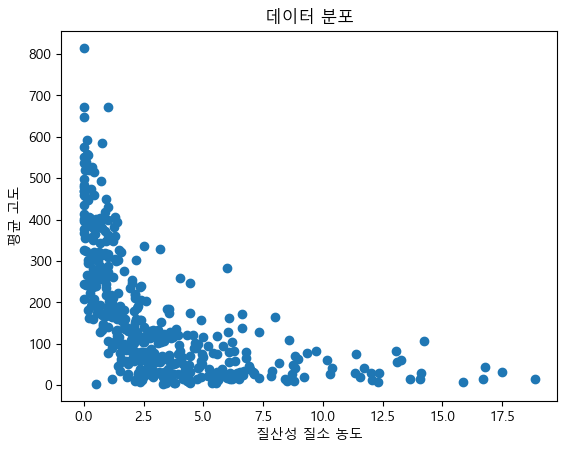

In [62]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows에서는 'Malgun Gothic' 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 산점도 (x축: mean, y축: 평균고도)
plt.scatter(data['mean'], data['평균고도'])
plt.title('데이터 분포')
plt.xlabel('질산성 질소 농도')
plt.ylabel('평균 고도')
plt.show()

### 실습 (12)

 데이터 분석
 - 기술통계에서 사용되는 corr()함수를 이용해 히트맵을 작성해 상관관계를 분석한다.

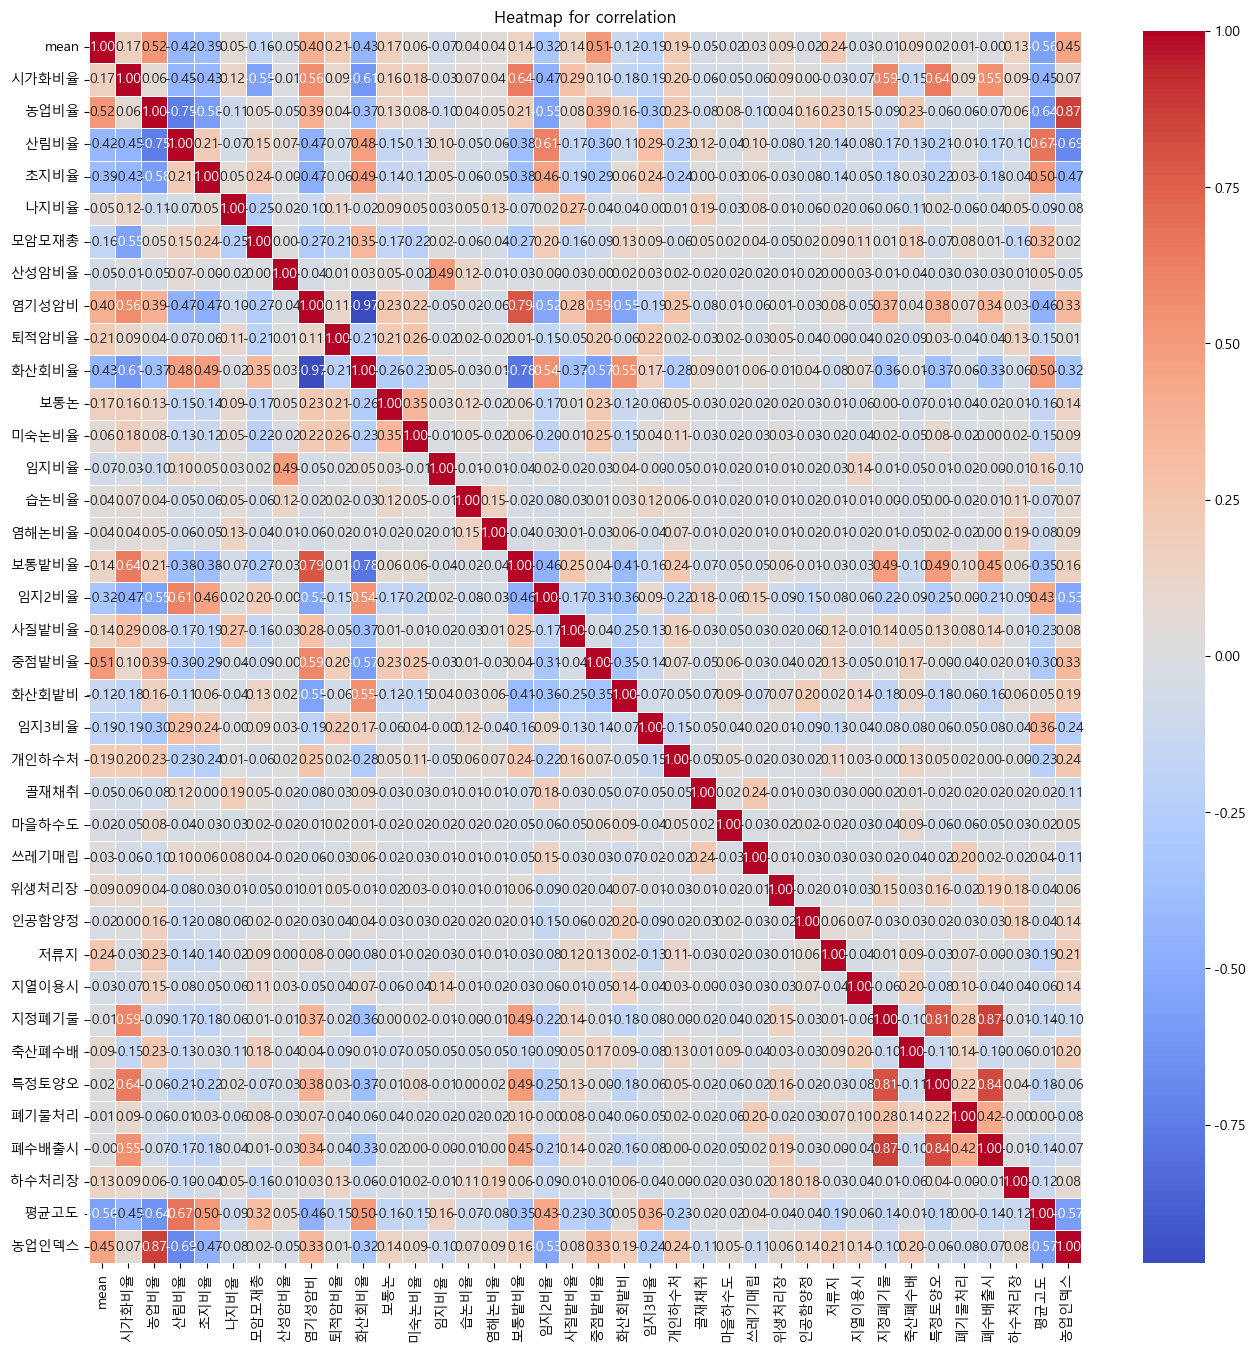

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap for correlation")
plt.show()



### 실습 (13)

 데이터 분리 및 스케일링
 * 훈련데이터 : 평가데이터 = 8:2
 * 표준화 이용해 데이터 스케일링 진행하였음

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 파일 읽기
jeju = pd.read_excel(r'F:\박정현\ML\Jeju_Water\JejuData.xlsx', engine='openpyxl')
data = jeju.copy()
# 컬럼 이름 트리밍
data.columns = data.columns.str.strip()

# 제거할 컬럼 리스트
drop_col = ['id', 'NO3-N_sum', '95Quantile', 'Count', 'median', '토지피복_1',
            '토지피복_2', '토지피복_3', '토지피복_4','토지피복_6', '토지피복_7', '토지피복_9', 
            '모암모재_0', '모암모재_1', '모암모재_3', '모암모재_4', '모암모재_6', '모암모재_8', 
            '모암모재_9', '토양유형_0','토양유형_1','토양유형_2', '토양유형_3', '토양유형_4', '토양유형_5', 
            '토양유형_6', '토양유형_7', '토양유형_8', '토양유형_9', '토양유형10', '토양유형11', 
            '토양유형12', '토지피복총', '제3기층비?', '토양유형총', '인덱스값', 'x', 'y']


# 불필요한 컬럼 제거 및 결측값 제거
data = data.drop(drop_col, axis=1, errors='ignore')
data = data.dropna()

# 데이터 필터링 및 타입 변환
data = data[data['mean'] != 'no']
data['mean'] = data['mean'].astype(float)

# 컬럼 선택
data_mean = data['mean']
data_x = data.iloc[:, 1:]

# 훈련데이터 : 평가데이터 = 8:2
x_train, x_test, y_train, y_test = train_test_split(data_x, data_mean, test_size=0.2, shuffle=True, random_state=4)

Scaler = StandardScaler()
Scaler.fit(x_train)
x_train_scale = pd.DataFrame(Scaler.transform(x_train), columns=x_train.columns)
x_test_scale = pd.DataFrame(Scaler.transform(x_test), columns=x_test.columns)

### 실습 (14)

하이퍼파라미터 튜닝(1) 
- RF


In [66]:
import random
import pandas as pd
import numpy as np
import optuna
from optuna import Trial
from optuna.pruners import HyperbandPruner
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

# 랜덤 시드 고정
random.seed(42)
np.random.seed(42)

def objective(trial: Trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 30, 300)
    max_depth = trial.suggest_int('max_depth', 2, 12)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 8)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 8)

    # 모델 생성
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # KFold 교차 검증 설정 (5-fold)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    # 교차 검증
    for train_index, valid_index in kf.split(x_train_scale):
        X_fold_train, X_fold_valid = x_train_scale.iloc[train_index], x_train_scale.iloc[valid_index]
        y_fold_train, y_fold_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

        model.fit(X_fold_train, y_fold_train)
        fold_predictions = model.predict(X_fold_valid)
        score = r2_score(y_fold_valid, fold_predictions)
        scores.append(score)

    # 교차 검증 평균 R^2 반환
    return np.mean(scores)

# Hyperband 프루너 설정
pruner = HyperbandPruner(
    min_resource=1,
    max_resource=100,
    reduction_factor=2,
)

# Optuna 스터디 생성 (랜덤 시드 설정)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

# 최종 모델 학습 및 평가 (Train 데이터 사용)
RF_model = RandomForestRegressor(**study.best_params, random_state=42)
RF_model.fit(x_train_scale, y_train)

# 연습 데이터로 평가
RF_train_prediction = RF_model.predict(x_train_scale)
RF_train_r2 = r2_score(y_train, RF_train_prediction)

# 테스트 데이터로 최종 평가
RF_final_predictions = RF_model.predict(x_test_scale)
RF_final_score = r2_score(y_test, RF_final_predictions)

print("Final score (R^2) on train data: ", RF_train_r2)
print("Final score (R^2) on test data: ", RF_final_score)



[I 2024-12-31 15:16:04,834] A new study created in memory with name: no-name-1463ec9d-3d06-4819-b45e-36131275c05d
[I 2024-12-31 15:16:06,415] Trial 0 finished with value: 0.4792865251284658 and parameters: {'n_estimators': 131, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.4792865251284658.
[I 2024-12-31 15:16:07,125] Trial 1 finished with value: 0.4553072157954376 and parameters: {'n_estimators': 72, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.4792865251284658.
[I 2024-12-31 15:16:09,240] Trial 2 finished with value: 0.4797679000428824 and parameters: {'n_estimators': 192, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.4797679000428824.
[I 2024-12-31 15:16:12,013] Trial 3 finished with value: 0.46853517915210074 and parameters: {'n_estimators': 255, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 2 with value: 0

Best hyperparameters:  {'n_estimators': 57, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3}
Best score:  0.4948263732848462
Final score (R^2) on train data:  0.8517343149245241
Final score (R^2) on test data:  0.5896951302798061


### 실습 (14)

하이퍼파라미터 튜닝(2) 
- ANN
- legacy.Adam 대신 Adamm 사용함 /from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import random
from sklearn.model_selection import train_test_split, KFold
import optuna
from optuna.pruners import HyperbandPruner
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'



# 모델 생성 함수 (은닉층마다 다른 노드 수를 적용)
def create_model(num_units_list, num_layers, dropout_rate, activation, optimizer):
    model = Sequential()
    
    # 첫 번째 은닉층 (첫 은닉층은 입력 크기 지정)
    model.add(Dense(num_units_list[0], activation=activation, input_shape=(x_train_scale.shape[1],)))
    model.add(Dropout(dropout_rate))  # 드롭아웃 추가
    
    # 추가 은닉층 (첫 은닉층 제외)
    for i in range(1, num_layers):
        model.add(Dense(num_units_list[i], activation=activation))
        model.add(Dropout(dropout_rate))  # 드롭아웃 추가
    
    # 출력층 (회귀 문제는 활성화 함수 제거)
    model.add(Dense(1))  # 출력층은 1개 노드 (연속적인 값 예측)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model


# Optuna Objective 함수 수정 (R^2 score 최적화)
def objective(trial):
    # 하이퍼파라미터 설정
    num_layers = trial.suggest_int("num_layers", 1, 4)  # 은닉층 수
    dropout_rate = trial.suggest_categorical("dropout_rate", [0.1, 0.2])  # 드롭아웃 비율
    activation = trial.suggest_categorical("activation", ["relu"])  # 활성화 함수
    optimizer_choice = trial.suggest_categorical("optimizer", ["adam"])  # Adam 옵티마이저 고정
    
    # 각 은닉층의 노드 수 설정 (최대 8개 은닉층)
    num_units_list = [trial.suggest_categorical(f"num_units_{i}", [8, 16, 32, 64, 128, 256]) for i in range(num_layers)]
    
    # 옵티마이저 설정
    if optimizer_choice == "adam":
        optimizer = Adam(learning_rate=0.001)  # Legacy Adam 옵티마이저 사용
    
    # KFold 설정
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_r2_scores = []  # R^2 score 저장 리스트
    
    # y_train이 numpy 배열인지 확인
    y_train_values = y_train.values if isinstance(y_train, pd.Series) else y_train
    
    for train_idx, val_idx in kf.split(x_train_scale, y_train_values):
        # Train/Validation Split
        x_train_fold, x_val_fold = x_train_scale.iloc[train_idx].values, x_train_scale.iloc[val_idx].values
        y_train_fold, y_val_fold = y_train_values[train_idx], y_train_values[val_idx]
        
        # 모델 생성
        model = create_model(num_units_list, num_layers, dropout_rate, activation, optimizer)
        
        # 모델 학습
        model.fit(x_train_fold, y_train_fold, epochs=15, batch_size=32, verbose=0)
        
        # 모델 평가
        y_pred = model.predict(x_val_fold, verbose=0)
        fold_r2 = r2_score(y_val_fold, y_pred)  # R^2 계산
        fold_r2_scores.append(fold_r2)
    
    return np.mean(fold_r2_scores)

# Optuna Study 생성 및 최적화 (시드 고정)
def optimize_with_fixed_seed():
    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))  # R^2는 최대화 방향
    study.optimize(objective, n_trials=100)
    return study


# Optuna 최적화 수행
study = optimize_with_fixed_seed()

# 최적의 하이퍼파라미터 출력
print(f"Best trial: ")
trial = study.best_trial
print(f"R^2: {trial.value}")
print(f"Parameters: ")
for key, value in trial.params.items():
    print(f"{key}: {value}")


# 최적의 파라미터로 모델 학습
best_params = trial.params
optimizer = Adam(learning_rate=0.001)  # legacy Adam 옵티마이저 사용 # 파이썬 버전 호환 불일치 이슈로 코드 패치

# best_params에서 num_units_list 추출
num_layers = best_params["num_layers"]
num_units_list = [best_params[f"num_units_{i}"] for i in range(num_layers)]  # 각 은닉층의 노드 수를 리스트로 생성

ANN_model = create_model(
    num_units_list,
    num_layers,
    best_params["dropout_rate"],
    best_params["activation"],
    optimizer
)

ANN_model.fit(x_train_scale.values, y_train.values, epochs=30, batch_size=32, verbose=0)

# 모델 저장
ANN_model.save("ANN_model_TEST.h5")  # 모델 저장 (HDF5 형식으로)

# 학습 평가
Train_prd = ANN_model.predict(x_train_scale.values)
Train_r2 = r2_score(y_train, Train_prd)  # R^2 계산

# 테스트 평가
Test_prd = ANN_model.predict(x_test_scale.values)
Test_r2 = r2_score(y_test, Test_prd)

# 평가 결과 출력
print(f"Train R^2: ", Train_r2)
print(f"Test R^2: ", Test_r2)



[I 2024-12-31 17:07:48,044] A new study created in memory with name: no-name-9166d536-d61a-4f9c-a50d-609ace527e98
C:\Users\EDAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\EDAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
C:\Us

ValueError: Unknown variable: <Variable path=sequential_7/dense_21/kernel, shape=(37, 128), dtype=float32, value=[[-0.1150009   0.03487119  0.01378301 ...  0.01704802 -0.11640916
  -0.11965606]
 [-0.06028384  0.07064554 -0.04666236 ... -0.07387868 -0.04872805
  -0.02197342]
 [ 0.00636715  0.03810655 -0.10679021 ...  0.06580752  0.01366112
  -0.03522237]
 ...
 [-0.0575801   0.06327814  0.17477626 ... -0.15950523 -0.09232467
   0.0412672 ]
 [ 0.15485659 -0.04450911 -0.15442938 ...  0.19035539 -0.06073739
   0.08677909]
 [-0.10662976 -0.17003456  0.00214916 ...  0.01753144 -0.16363251
   0.13024577]]>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [9]:
optimizer = Adam(learning_rate=0.001)

In [10]:
optimizer